In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [4]:
df = pd.read_csv('selected_data.csv')

In [5]:
print(df['Category Name'].unique())

['agriculture_rural_development' 'aid_effectiveness' 'climate_change'
 'economy_growth' 'education' 'energy_mining' 'environment'
 'financial_sector' 'gender' 'health' 'infrastructure' 'private_sector'
 'social_development' 'social_protection_labor' 'trade' 'urban_developmen']


In [6]:
print(df['Country Name'].unique())

['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Burundi' 'Belgium' 'Bulgaria' 'Belarus' 'Belize' 'Bolivia' 'Brazil'
 'Barbados' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' 'Cameroon' 'Colombia' 'Costa Rica' 'Cyprus' 'Czechia'
 'Germany' 'Denmark' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Spain'
 'Estonia' 'Finland' 'Fiji' 'France' 'Gabon' 'United Kingdom' 'Georgia'
 'Ghana' 'Gambia, The' 'Greece' 'Guatemala' 'Honduras' 'Croatia' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Jamaica'
 'Jordan' 'Japan' 'Kazakhstan' 'Kenya' 'Korea, Rep.' 'Lebanon' 'Lithuania'
 'Luxembourg' 'Latvia' 'Morocco' 'Madagascar' 'Mexico' 'North Macedonia'
 'Malta' 'Mauritius' 'Malaysia' 'Nicaragua' 'Netherlands' 'Norway'
 'New Zealand' 'Oman' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Paraguay' 'Romania' 'Russian Federation' 'Saudi Arabia' 'Singapore'
 'El Salvador' 'Slovak Republic' 'Slovenia' 'Sweden' 'Thailand' 'Tunisia'
 '

In [7]:
def fill_missing_with_mean(data):
    filled_data = data.copy()

    filled_data.loc[:,"1991":"2021"] = filled_data.loc[:,"1991":"2021"].interpolate('linear', axis =1, limit_direction='both')
    return filled_data

In [8]:
df_filled = fill_missing_with_mean(df)

In [9]:
def min_max_scaling_by_specific_category(data): 
    
    scaled_df = data.copy()
    general_categories = scaled_df['Category Name'].unique()
    
    scaler = MinMaxScaler()
    for general_category in general_categories:
        specific_categories = scaled_df.loc[scaled_df['Category Name'] == general_category, 'Indicator Name'].unique()
        for specific_category in specific_categories:
            selected_data = scaled_df[(scaled_df['Category Name'] == general_category) & (scaled_df['Indicator Name'] == specific_category)]
            numeric_cols = selected_data.select_dtypes(include=['float64', 'int64']).columns
            data_to_scale = selected_data[numeric_cols]
            
            if len(data_to_scale.columns) > 0:
                scaled_data = scaler.fit_transform(data_to_scale)
                scaled_df.loc[selected_data.index, numeric_cols] = scaled_data
    
    return scaled_df

In [10]:
df_scaled = min_max_scaling_by_specific_category(df_filled)

In [11]:
selected_columns = df_scaled.loc[:,"1991":"2021"]
row_mean = selected_columns.mean(axis=1)
df_scaled['Mean'] = row_mean
df_scaled.head()

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Country Name,Mean
0,ALB,agriculture_rural_development,Rural population (% of total population),0.676680,0.672119,0.667557,0.662960,0.658365,0.653724,0.649098,...,0.493936,0.484134,0.474581,0.465290,0.456271,0.447526,0.439067,0.430884,Albania,0.568331
1,ARG,agriculture_rural_development,Rural population (% of total population),0.135464,0.133436,0.131449,0.129482,0.127558,0.125653,0.123790,...,0.097740,0.096642,0.095569,0.094520,0.093483,0.092446,0.091422,0.090421,Argentina,0.110087
2,ARM,agriculture_rural_development,Rural population (% of total population),0.351168,0.354766,0.358393,0.362076,0.365808,0.369584,0.373406,...,0.418118,0.419861,0.421381,0.422675,0.423731,0.424556,0.425149,0.425508,Armenia,0.396526
3,AUS,agriculture_rural_development,Rural population (% of total population),0.156043,0.157611,0.159299,0.161013,0.162756,0.164525,0.166309,...,0.163198,0.162633,0.162078,0.161477,0.160841,0.160168,0.159447,0.158688,Australia,0.165043
4,AUT,agriculture_rural_development,Rural population (% of total population),0.398856,0.402547,0.406281,0.410062,0.413885,0.417765,0.421673,...,0.481434,0.480938,0.480471,0.480056,0.479521,0.478854,0.478051,0.477124,Austria,0.451969


Analiza dla kategorii zmian klimatu (climate_change)

In [12]:
df_climate_change = df_scaled[df_scaled['Category Name'] == 'climate_change']
df_climate_change

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Country Name,Mean
485,ALB,climate_change,Urban population (% of total population),0.323320,0.327881,0.332443,0.337040,0.341635,0.346276,0.350902,...,0.506064,0.515866,0.525419,0.534710,0.543729,0.552474,0.560933,0.569116,Albania,0.431669
486,ARG,climate_change,Urban population (% of total population),0.864536,0.866564,0.868551,0.870518,0.872442,0.874347,0.876210,...,0.902260,0.903358,0.904431,0.905480,0.906517,0.907554,0.908578,0.909579,Argentina,0.889913
487,ARM,climate_change,Urban population (% of total population),0.648832,0.645234,0.641607,0.637924,0.634192,0.630416,0.626594,...,0.581882,0.580139,0.578619,0.577325,0.576269,0.575444,0.574851,0.574492,Armenia,0.603474
488,AUS,climate_change,Urban population (% of total population),0.843957,0.842389,0.840701,0.838987,0.837244,0.835475,0.833691,...,0.836802,0.837367,0.837922,0.838523,0.839159,0.839832,0.840553,0.841312,Australia,0.834957
489,AUT,climate_change,Urban population (% of total population),0.601144,0.597453,0.593719,0.589938,0.586115,0.582235,0.578327,...,0.518566,0.519062,0.519529,0.519944,0.520479,0.521146,0.521949,0.522876,Austria,0.548031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,UKR,climate_change,"Mortality rate, under-5 (per 1,000 live births)",0.075319,0.078143,0.073740,0.086572,0.090265,0.093009,0.093620,...,0.062069,0.061062,0.061650,0.059908,0.060094,0.059846,0.062438,0.063330,Ukraine,0.075399
869,URY,climate_change,"Mortality rate, under-5 (per 1,000 live births)",0.093279,0.092832,0.083289,0.093051,0.093215,0.091825,0.088849,...,0.057759,0.056637,0.054397,0.050691,0.046948,0.043436,0.041625,0.038815,Uruguay,0.071162
870,USA,climate_change,"Mortality rate, under-5 (per 1,000 live births)",0.027231,0.026439,0.023342,0.027091,0.027729,0.027844,0.027430,...,0.037069,0.038053,0.038985,0.038710,0.039437,0.039575,0.041625,0.042901,United States,0.033435
871,ZAF,climate_change,"Mortality rate, under-5 (per 1,000 live births)",0.316918,0.317861,0.287533,0.325088,0.333333,0.344194,0.358974,...,0.307759,0.307965,0.310063,0.307834,0.307981,0.308880,0.313181,0.314607,South Africa,0.376438


In [13]:
unique_indicators = df_climate_change['Indicator Name'].unique()
for indicator in unique_indicators:
    print(indicator)

Urban population (% of total population)
Population, total
Population growth (annual %)
Mortality rate, under-5 (per 1,000 live births)


Klastracja metodą KMeans

In [14]:
selected_columns_climate_change = df_climate_change.loc[:, "1991":"2021"]

In [15]:
kmeans_climate_change = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_climate_change.fit(selected_columns_climate_change)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [16]:
df_climate_change['Cluster'] = kmeans_climate_change.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_29188\3326157071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate_change['Cluster'] = kmeans_climate_change.labels_


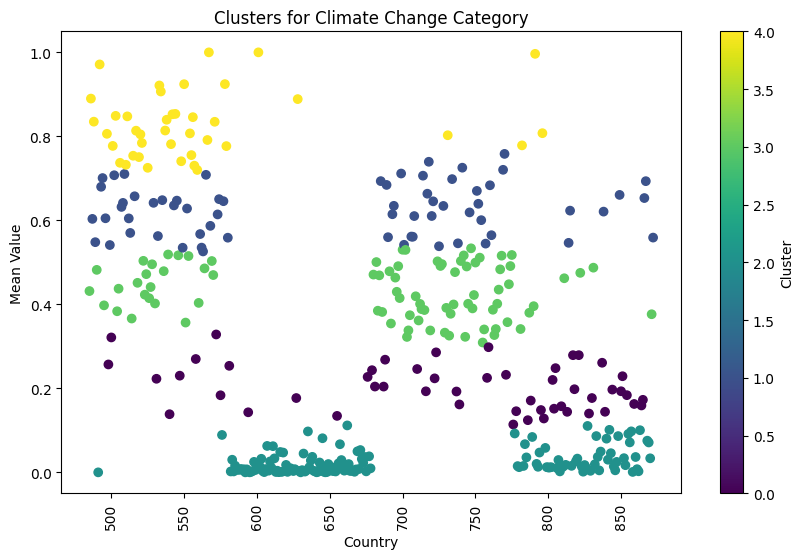

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_climate_change.index, df_climate_change['Mean'], c=df_climate_change['Cluster'], cmap='viridis')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.title('Clusters for Climate Change Category')
plt.xticks(rotation=90)
plt.colorbar(label='Cluster')
plt.show()

In [18]:
print(df_climate_change)

    Country Code   Category Name  \
485          ALB  climate_change   
486          ARG  climate_change   
487          ARM  climate_change   
488          AUS  climate_change   
489          AUT  climate_change   
..           ...             ...   
868          UKR  climate_change   
869          URY  climate_change   
870          USA  climate_change   
871          ZAF  climate_change   
872          ZWE  climate_change   

                                      Indicator Name      1991      1992  \
485         Urban population (% of total population)  0.323320  0.327881   
486         Urban population (% of total population)  0.864536  0.866564   
487         Urban population (% of total population)  0.648832  0.645234   
488         Urban population (% of total population)  0.843957  0.842389   
489         Urban population (% of total population)  0.601144  0.597453   
..                                               ...       ...       ...   
868  Mortality rate, under-5 (per 1

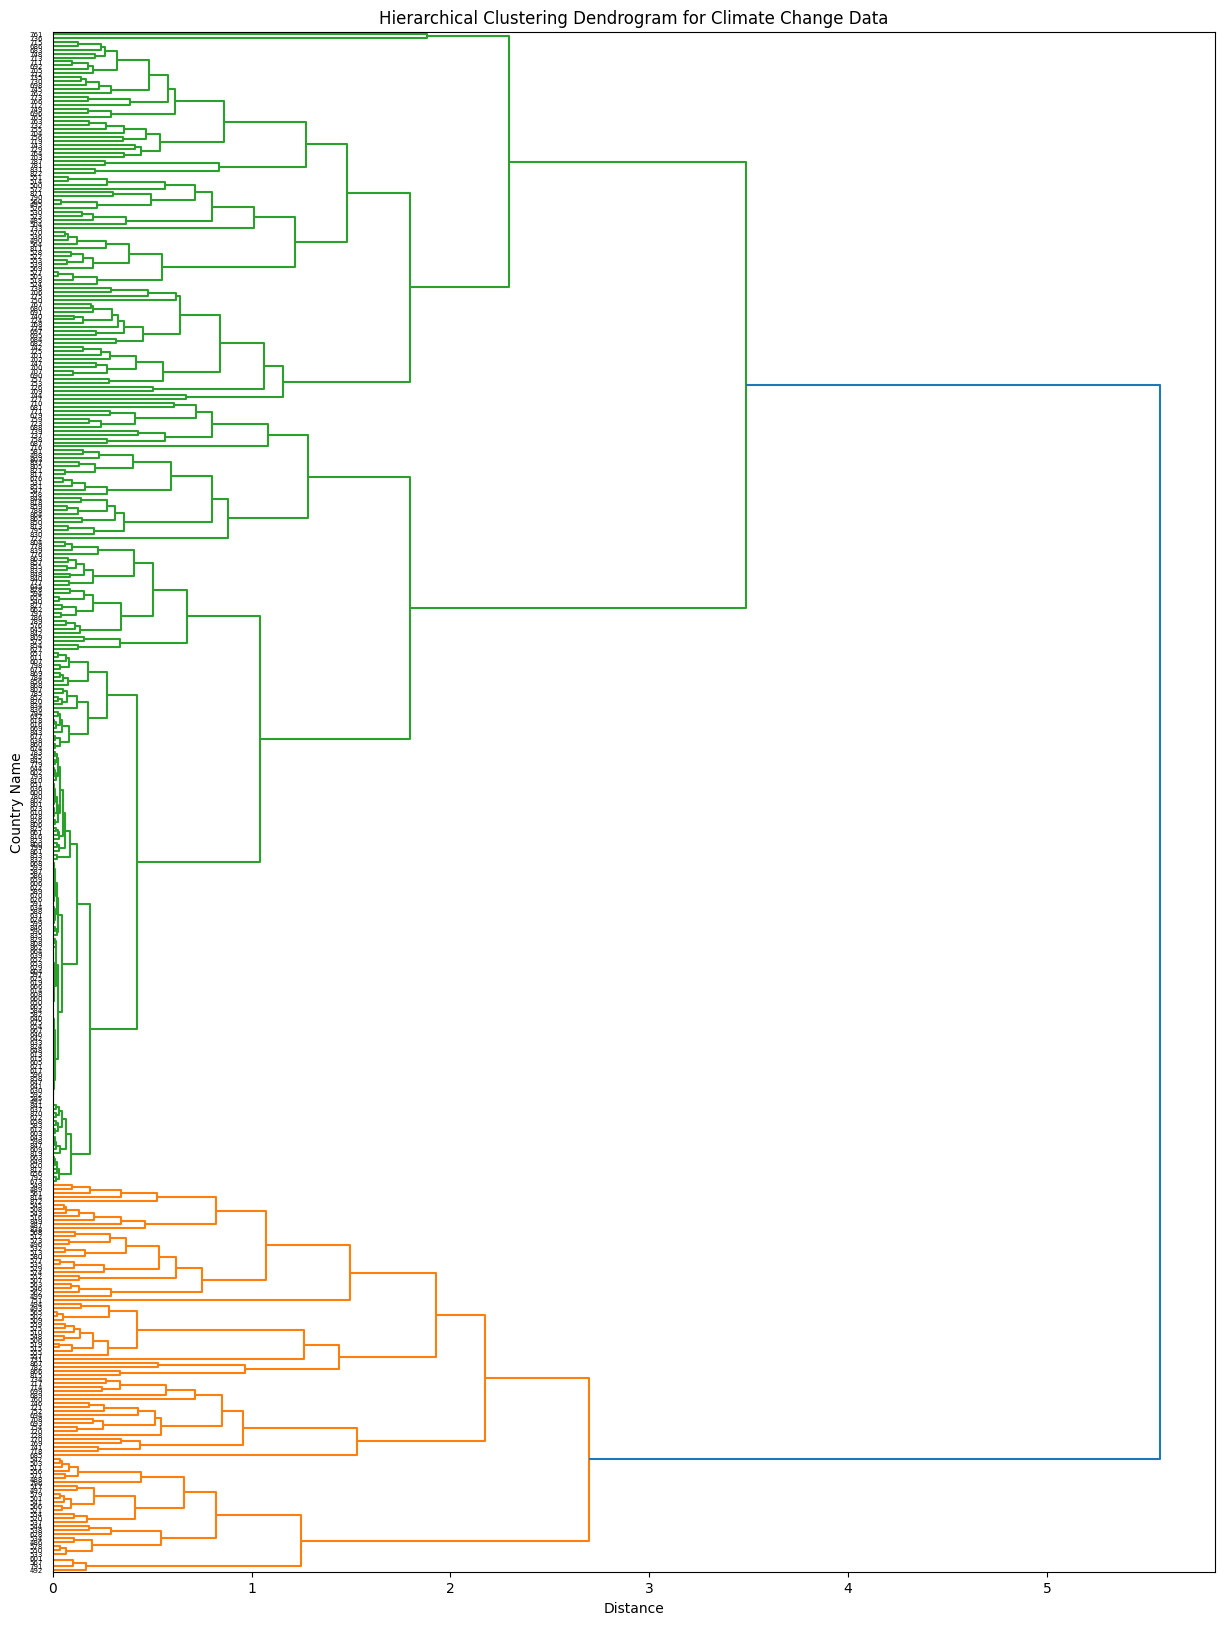

In [19]:
distance_matrix = hierarchy.distance.pdist(selected_columns_climate_change)

# Tworzenie dendrogramu
dendrogram = hierarchy.linkage(distance_matrix, method='complete')

# Wyświetlenie dendrogramu
plt.figure(figsize=(15, 20))
hierarchy.dendrogram(dendrogram, labels=df_climate_change.index, leaf_rotation=00, orientation='right')
plt.xlabel('Distance')
plt.ylabel('Country Name')
plt.title('Hierarchical Clustering Dendrogram for Climate Change Data')
plt.show()

Wizualizacja za pomocą TSNE

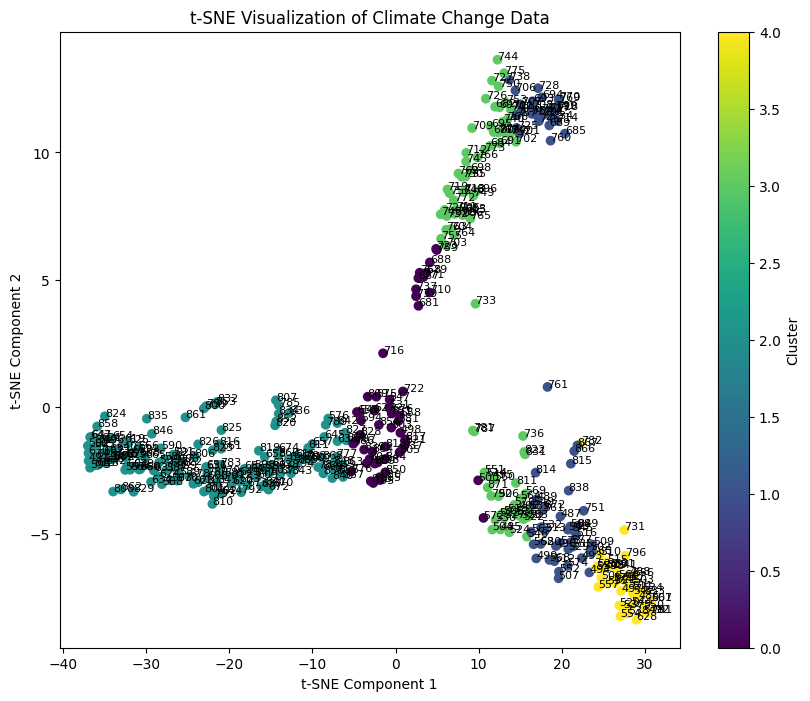

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(selected_columns_climate_change)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=df_climate_change['Cluster'], cmap='viridis')

# Dodanie adnotacji dla krajów
for i, country in enumerate(df_climate_change.index):
    plt.annotate(country, (tsne_features[i, 0], tsne_features[i, 1]), size=8)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Climate Change Data')
plt.colorbar(label='Cluster')
plt.show()

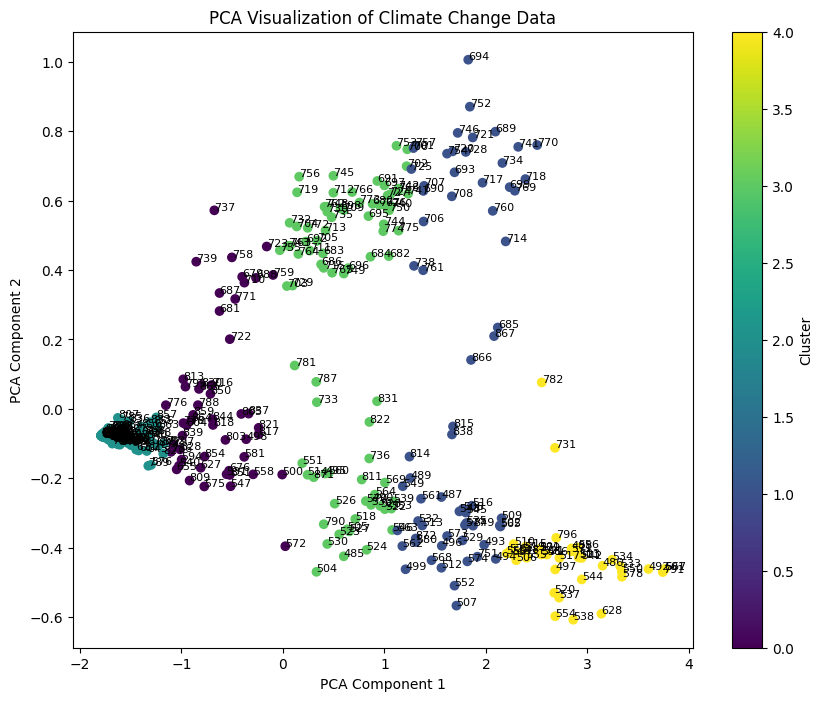

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(selected_columns_climate_change)

plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df_climate_change['Cluster'], cmap='viridis')

for i, country in enumerate(df_climate_change.index):
    plt.annotate(country, (pca_features[i, 0], pca_features[i, 1]), size=8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Climate Change Data')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_29188\2417626910.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


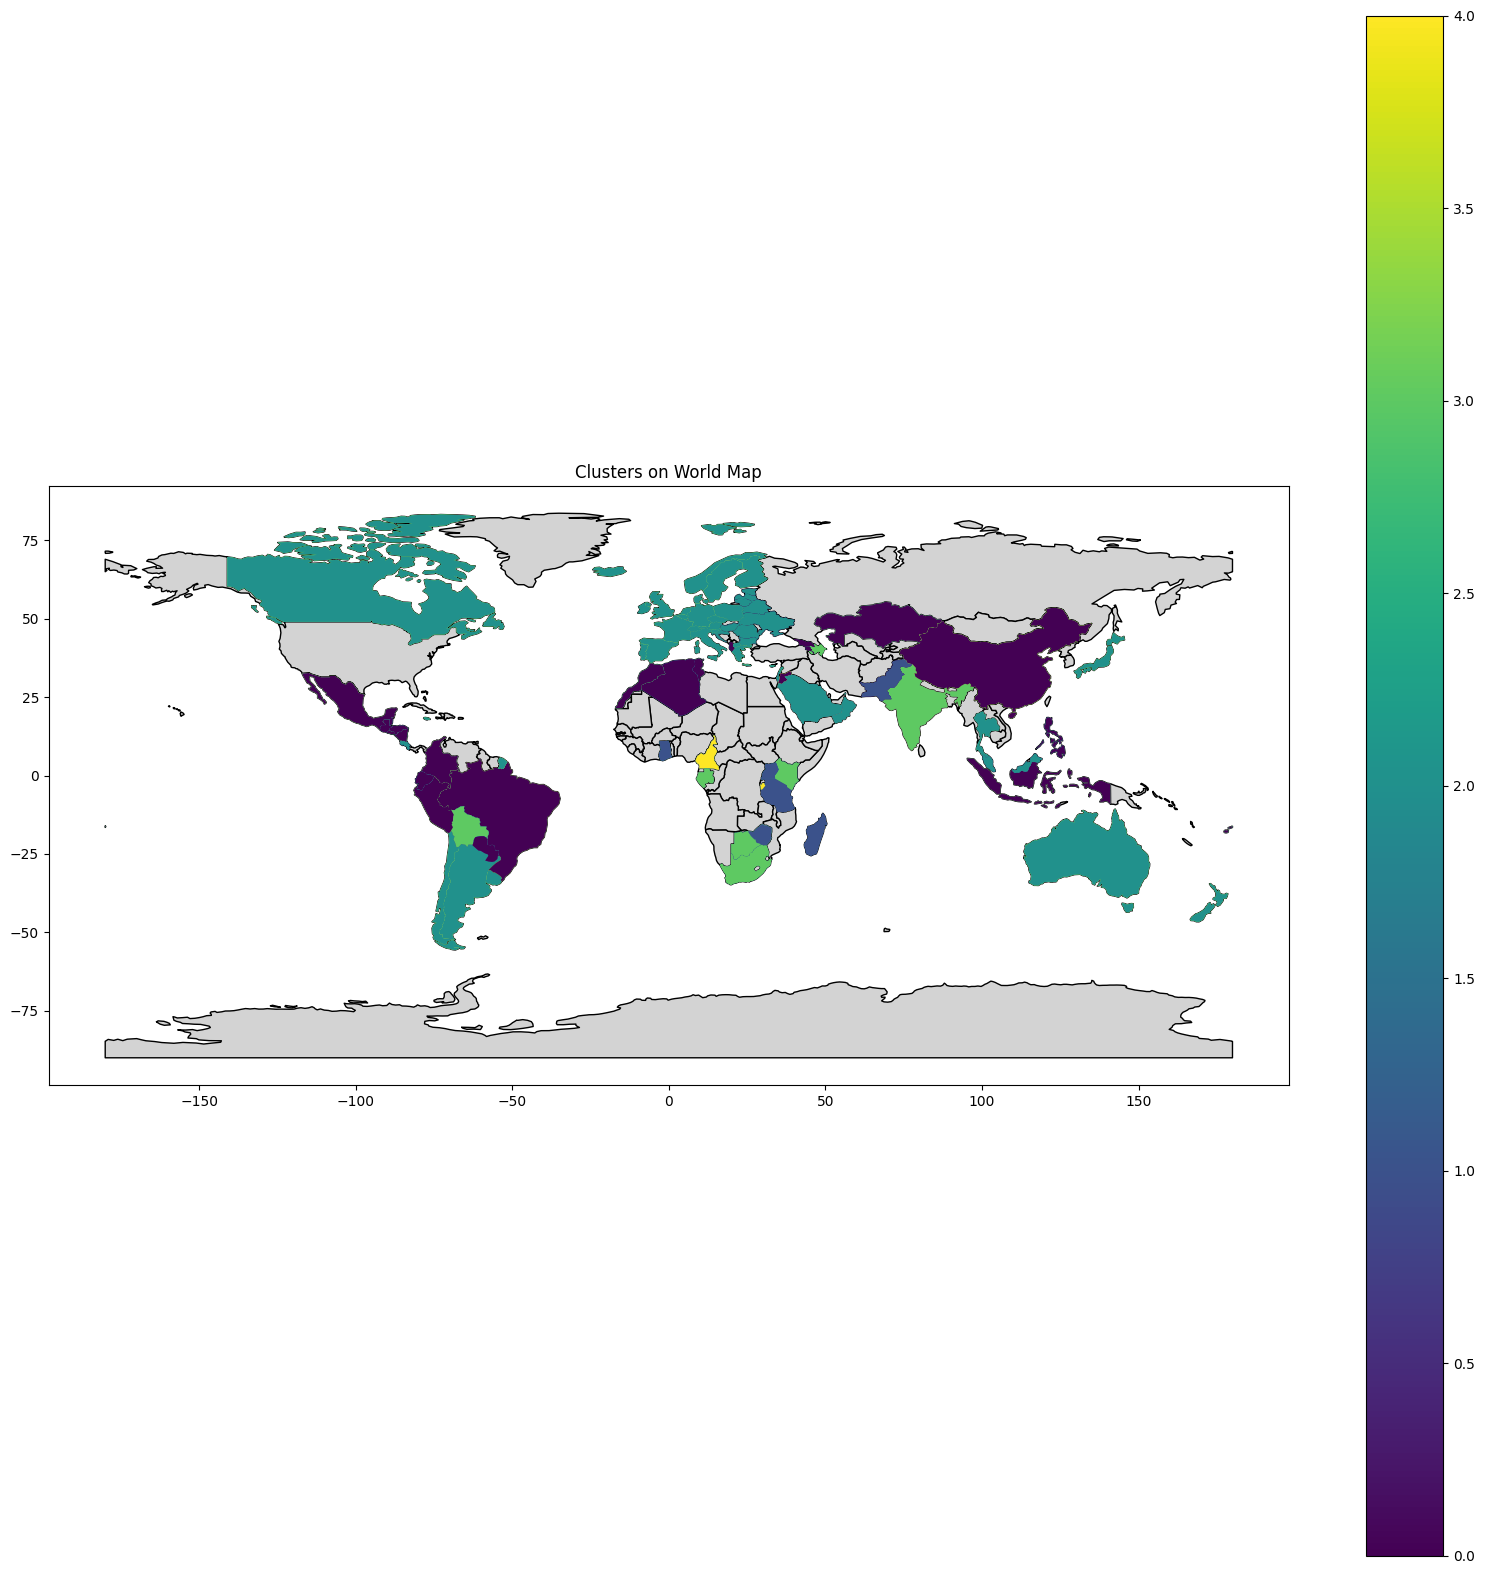

In [22]:
import geopandas as gpd
# Wczytanie danych geograficznych krajów
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Połączenie danych geograficznych z danymi klastrów
world_clusters = world.merge(df_climate_change, how='left', left_on='name', right_on='Country Name')

# Ustawienie rozmiaru mapy podczas wywoływania funkcji plot
fig, ax = plt.subplots(figsize=(20, 20))

# Wyświetlenie mapy świata
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Wstawianie kolorowych krajów na mapie dla każdego kraju
world_clusters.plot(column='Cluster', cmap='viridis', ax=ax, legend=True)

# Dodanie tytułu do mapy
ax.set_title('Clusters on World Map')

# Wyświetlenie mapy
plt.show()

Analiza dla kategorii EDUKACJA

In [23]:
df_education = df_scaled[df_scaled['Category Name'] == 'education']
df_education

,Country Code,Category Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,Country Name,Mean
2813,ALB,education,Population ages 15-64 (% of total population),0.543033,0.540343,0.573014,0.569956,0.536789,0.544250,0.551030,...,0.650386,0.656400,0.662742,0.675539,0.692084,0.709102,0.724694,0.739579,Albania,0.616651
2814,ARG,education,Population ages 15-64 (% of total population),0.511387,0.511600,0.550750,0.552582,0.523492,0.535140,0.543455,...,0.505474,0.515003,0.523402,0.537876,0.556756,0.579209,0.602943,0.631180,Argentina,0.540239
2815,ARM,education,Population ages 15-64 (% of total population),0.644903,0.619145,0.620158,0.600967,0.563572,0.571845,0.579681,...,0.714429,0.704855,0.696790,0.694242,0.695894,0.700549,0.706666,0.713036,Armenia,0.668123
2816,AUS,education,Population ages 15-64 (% of total population),0.751043,0.744794,0.757583,0.750937,0.729468,0.734058,0.736416,...,0.585635,0.583840,0.583245,0.589799,0.600559,0.614338,0.626918,0.640794,Australia,0.675747
2817,AUT,education,Population ages 15-64 (% of total population),0.777719,0.771800,0.781471,0.771850,0.748199,0.750931,0.753655,...,0.616932,0.620502,0.625108,0.634147,0.646622,0.661765,0.675090,0.686220,Austria,0.700588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651,UKR,education,Primary school starting age (years),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,Ukraine,0.693548
4652,URY,education,Primary school starting age (years),0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,Uruguay,0.505376
4653,USA,education,Primary school starting age (years),0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,United States,0.505376
4654,ZAF,education,Primary school starting age (years),0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,South Africa,0.903226


In [24]:
unique_indicators = df_education['Indicator Name'].unique()
for indicator in unique_indicators:
    print(indicator)

Population ages 15-64 (% of total population)
Population ages 0-14 (% of total population)
Unemployment, total (% of total labor force) (modeled ILO estimate)
Unemployment, male (% of male labor force) (modeled ILO estimate)
Unemployment, female (% of female labor force) (modeled ILO estimate)
Labor force, total
Labor force, female (% of total labor force)
Probability of dying among youth ages 20-24 years (per 1,000)
Probability of dying among adolescents ages 15-19 years (per 1,000)
Probability of dying among adolescents ages 10-14 years (per 1,000)
Probability of dying among children ages 5-9 years (per 1,000)
Number of deaths ages 20-24 years
Number of deaths ages 15-19 years
Number of deaths ages 10-14 years
Number of deaths ages 5-9 years
Secondary education, duration (years)
Lower secondary school starting age (years)
Primary education, duration (years)
Primary school starting age (years)


In [25]:
selected_columns_education = df_education.loc[:, "1991":"2021"]

In [26]:
kmeans_education = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_education.fit(selected_columns_education)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [27]:
df_education['Cluster'] = kmeans_education.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_29188\330742988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education['Cluster'] = kmeans_education.labels_


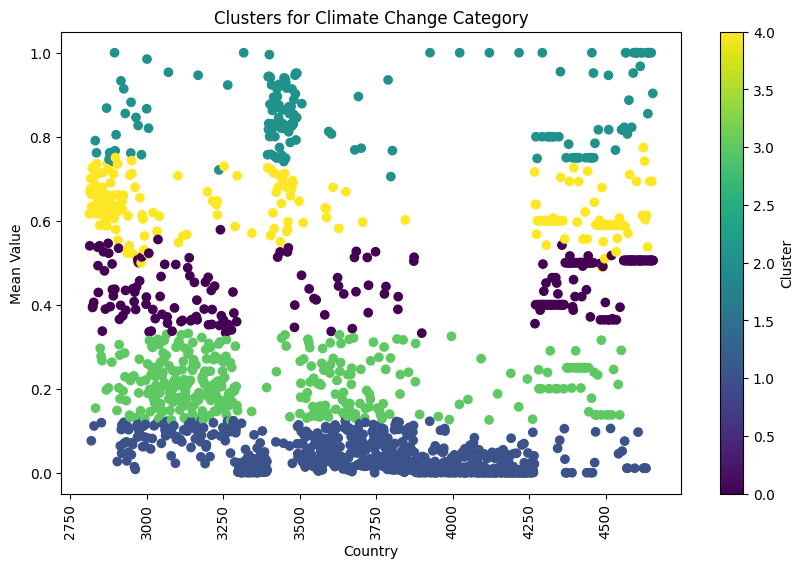

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df_education.index, df_education['Mean'], c=df_education['Cluster'], cmap='viridis')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.title('Clusters for Climate Change Category')
plt.xticks(rotation=90)
plt.colorbar(label='Cluster')
plt.show()

In [29]:

distance_matrix = hierarchy.distance.pdist(selected_columns_education)


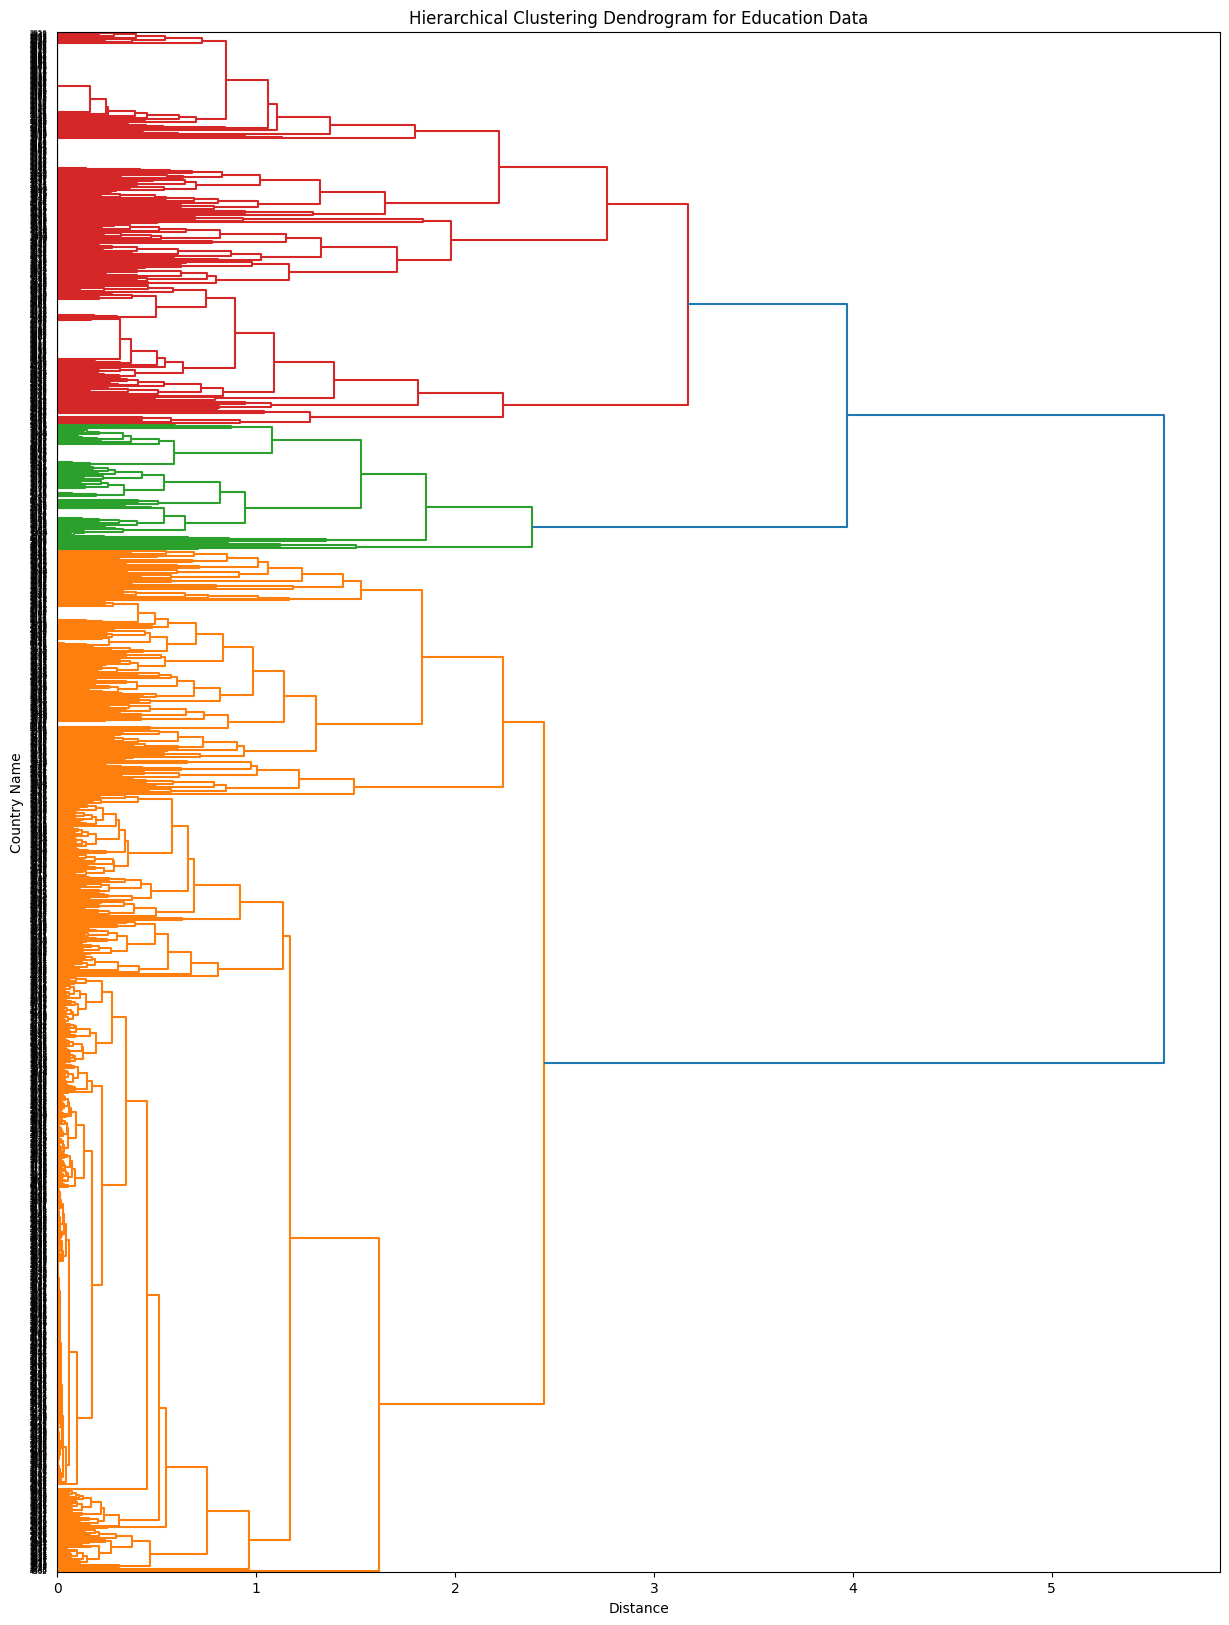

In [30]:
# Tworzenie dendrogramu
dendrogram = hierarchy.linkage(distance_matrix, method='complete')

# Wyświetlenie dendrogramu
plt.figure(figsize=(15, 20))
hierarchy.dendrogram(dendrogram, labels=df_education.index, leaf_rotation=00, orientation='right')
plt.xlabel('Distance')
plt.ylabel('Country Name')
plt.title('Hierarchical Clustering Dendrogram for Education Data')
plt.show()

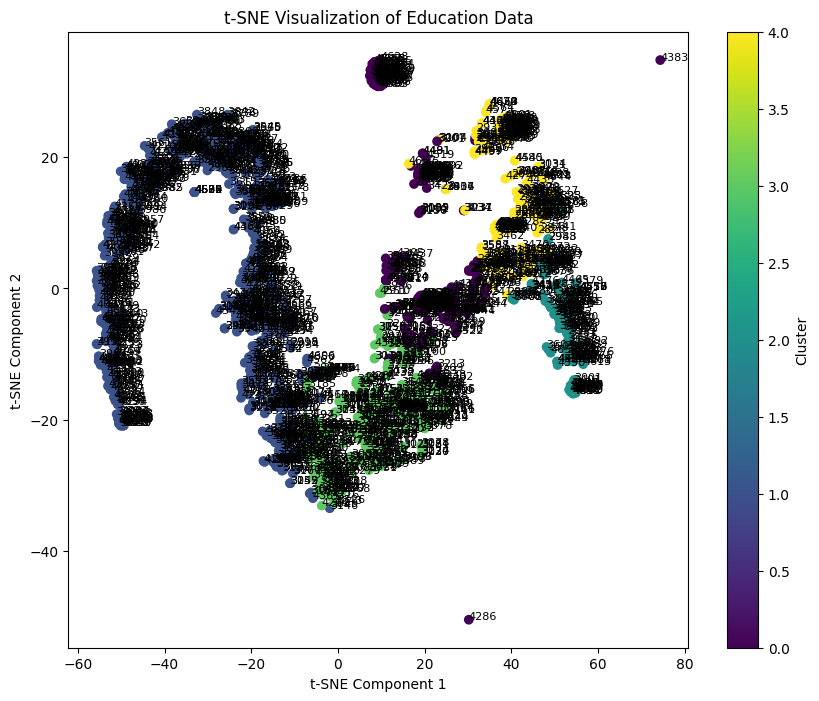

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(selected_columns_education)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=df_education['Cluster'], cmap='viridis')

# Dodanie adnotacji dla krajów
for i, country in enumerate(df_education.index):
    plt.annotate(country, (tsne_features[i, 0], tsne_features[i, 1]), size=8)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Education Data')
plt.colorbar(label='Cluster')
plt.show()

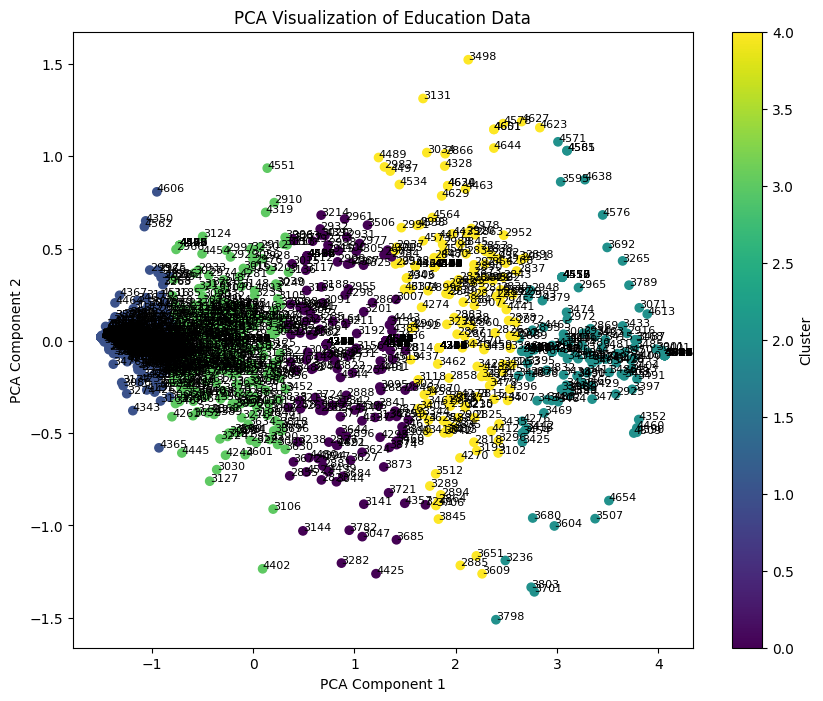

In [32]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(selected_columns_education)

plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df_education['Cluster'], cmap='viridis')

for i, country in enumerate(df_education.index):
    plt.annotate(country, (pca_features[i, 0], pca_features[i, 1]), size=8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Education Data')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_29188\2629139754.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


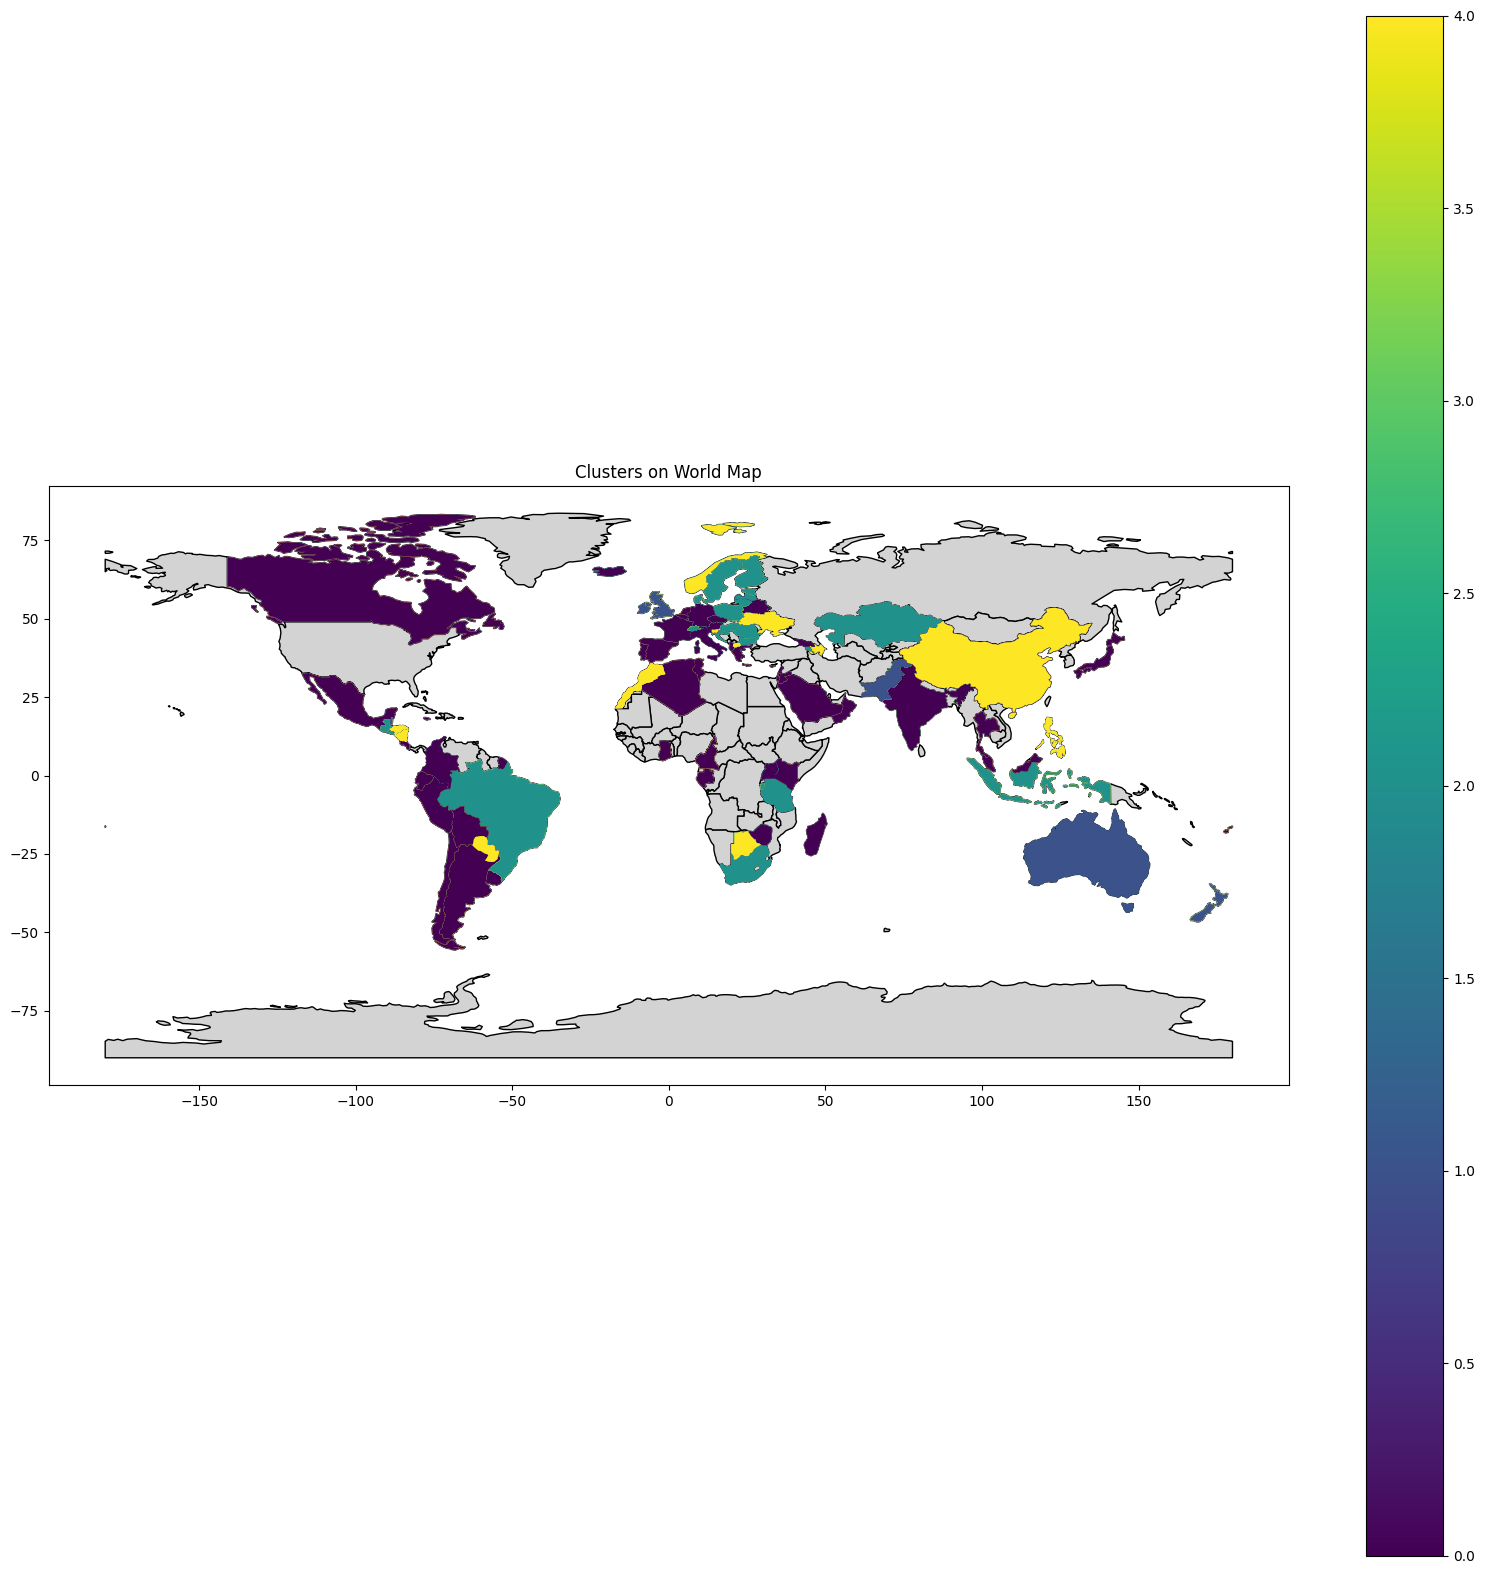

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_clusters = world.merge(df_education, how='left', left_on='name', right_on='Country Name')
fig, ax = plt.subplots(figsize=(20, 20))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
world_clusters.plot(column='Cluster', cmap='viridis', ax=ax, legend=True)
ax.set_title('Clusters on World Map')
plt.show()